In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from patsy import dmatrices
import matplotlib.pyplot as plt
import matplotlib
import string
import re
matplotlib.style.use('ggplot')

> Import data

In [2]:
with open("movie_data_02.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)

> Add studio variable

In [3]:
df.rename(columns={'Sci-Fi': 'Sci_Fi'}, inplace=True)
df.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,Horror,Music,Musical,Mystery,Romance,Sci_Fi,Sport,Thriller,War,Western
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,1,0,0,1,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,1,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
studio = df['studio'].str.get_dummies()
studio.head()

,"""DIA"" Productions GmbH & Co. KG",10th Hole Productions,120 Films,120dB Films,13th Night Productions,1492 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Loop Films,2-Team Productions,...,Zero Pictures Co.,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for name in studio.columns:
    name_as_list = name.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = 'X_' + '_'.join(new_list)
    studio.rename(columns={name: new_name}, inplace=True)

studio.head()

,X_dia_productions_gmbh__co_kg,X_10th_hole_productions,X_120_films,X_120db_films,X_13th_night_productions,X_1492_pictures,X_19_entertainment,X_1984_private_defense_contractors,X_2_loop_films,X_2team_productions,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_studio = df.join(studio)

In [7]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


> Re-index by title

In [8]:
df_studio = df_studio.set_index('title')

In [9]:
df_studio.head()

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,USA,James Mangold,118,47095453,English,Meg Ryan,44,311,59283,2562448.0,...,0,0,0,0,0,0,0,0,0,0
Glitter,USA,Vondie Curtis-Hall,104,4273372,English,Mariah Carey,14,305,18755,2414596.0,...,0,0,0,0,0,0,0,0,0,0
In the Mood for Love,Hong Kong,Kar Wai Wong,98,2734044,Cantonese,Tony Chiu Wai Leung,85,342,66416,138340.5,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,Spain,John Malkovich,132,2377348,English,Javier Bardem,64,71,5333,92433.0,...,0,0,0,0,0,0,0,0,0,0
State and Main,France,David Mamet,105,6920692,English,Philip Seymour Hoffman,75,169,17670,580163.0,...,0,0,0,0,0,0,0,0,0,0


> Test and train split

In [10]:
test = df_studio[df_studio['release'] >= '2011-01-01 00:00:00']
train = df_studio[df_studio['release'] < '2011-01-01 00:00:00']

print len(train), len(test)
print len(test) / (len(train) + len(test))

2745 1033
0.273425092642


## Investigate numerical variables

Month

In [11]:
monthly = train.groupby(['month'])['metacritic'].mean()

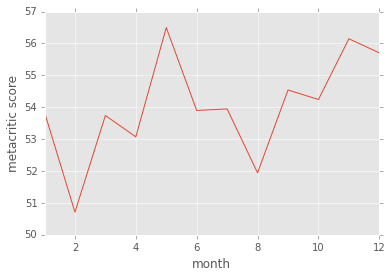

In [12]:
monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

> Reset y-axis to start at 0

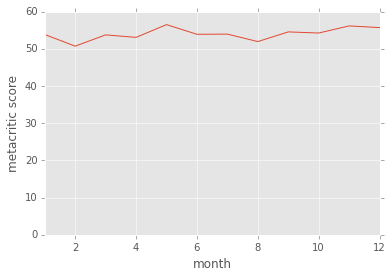

In [13]:
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,60))

monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

In [14]:
monthly

month
1     53.843220
2     50.710000
3     53.741803
4     53.072034
5     56.500000
6     53.898936
7     53.948276
8     51.943089
9     54.541958
10    54.242958
11    56.147826
12    55.706161
Name: metacritic, dtype: float64

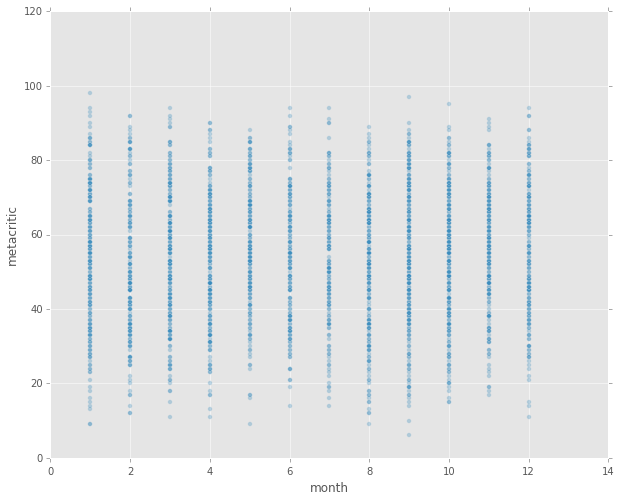

In [15]:
train.plot(kind='scatter', x='month', y='metacritic', alpha=0.3, figsize = (10,8))

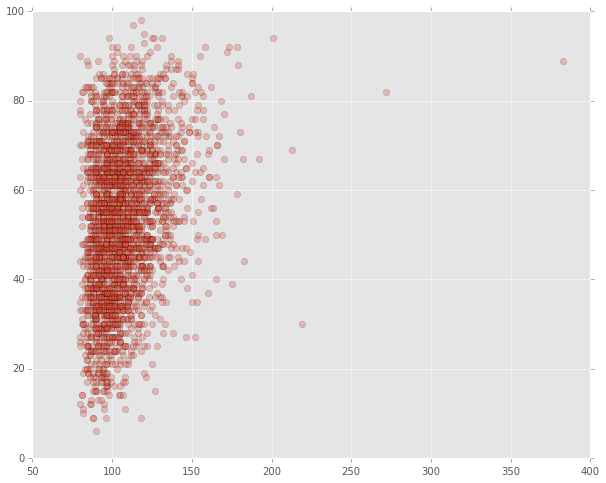

In [16]:
plt.figure(figsize = (10,8))
duration = train['duration']
y = train['metacritic']

plt.plot(duration, y, 'o', alpha=0.3)

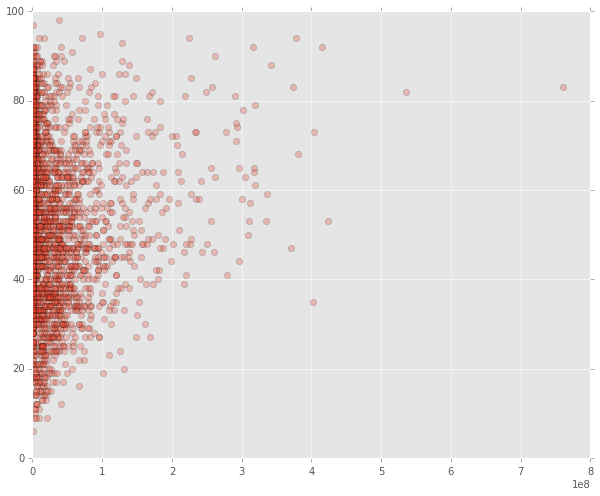

In [18]:
plt.figure(figsize = (10,8))
gross = train['gross']

plt.plot(gross, y, 'o', alpha=0.3)

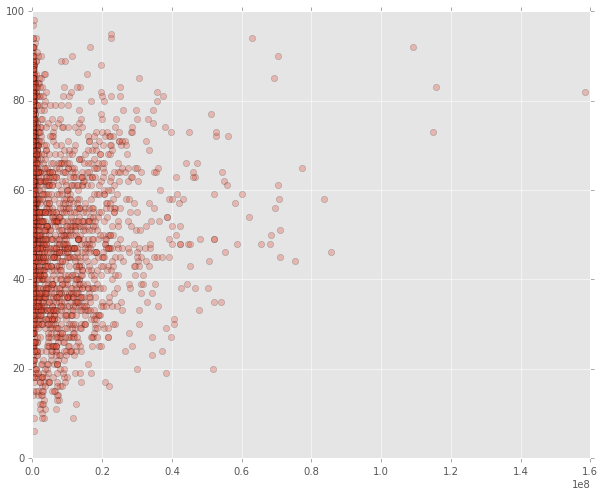

In [19]:
plt.figure(figsize = (10,8))
opening = train['opening']

plt.plot(opening, y, 'o', alpha=0.3)

## Investigate and transform categorical variables
Production studios

In [20]:
groupby_studios = train.groupby(['studio'])

studios_freq = groupby_studios.filter(lambda x: len(x) > 4)
top_studios = studios_freq.groupby(['studio']).size().order(ascending=False)[:20]

pro_studios = top_studios.index


def transform_names(series):
    """
    Transforms the studio names to new column names.
    Returns strings of studio names separated by '+' 
    for use in regression function.
    """
    series_new = []
    for name in series:
        name_as_list = name.split()
        new_list = []
        for word in name_as_list:
            word = re.sub("[^a-z0-9]", "", word.lower())
            new_list.append(word)
        new_name = 'X_' + '_'.join(new_list)
        series_new.append(new_name)
        series_str = ' + '.join(series_new)
    return str(series_str)


pro_studios_str = transform_names(pro_studios)

pro_studios_str

'X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_walt_disney_pictures + X_miramax + X_fox_searchlight_pictures + X_dimension_films + X_revolution_studios + X_screen_gems + X_fox_2000_pictures + X_focus_features + X_lionsgate + X_castle_rock_entertainment'

In [23]:
train.sort(['metacritic'], ascending=False)[:10]

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Pan's Labyrinth,Spain,Guillermo del Toro,118,37623143,Spanish,Ivana Baquero,98,"1,056",413099,501691.0,...,0,0,0,0,0,0,0,0,0,0
"4 Months, 3 Weeks and 2 Days",Romania,Cristian Mungiu,113,1185783,Romanian,Anamaria Marinca,97,171,42166,51712.0,...,0,0,0,0,0,0,0,0,0,0
The Social Network,USA,David Fincher,120,96917897,English,Jesse Eisenberg,95,677,420702,22445653.0,...,0,0,0,0,0,0,0,0,0,0
The Hurt Locker,USA,Kathryn Bigelow,131,17017811,English,Jeremy Renner,94,843,294491,145352.0,...,0,0,0,0,0,0,0,0,0,0
Spirited Away,Japan,Hayao Miyazaki,125,10049886,Japanese,Daveigh Chase,94,845,353360,1052197.0,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Return of the King,USA,Peter Jackson,201,377845905,English,Elijah Wood,94,"3,124",1064729,22532641.5,...,0,0,0,0,0,0,0,0,0,0
Sideways,USA,Alexander Payne,126,71502303,English,Paul Giamatti,94,825,139356,207042.0,...,0,0,0,0,0,0,0,0,0,0
WALL·E,USA,Andrew Stanton,98,223808164,English,Ben Burtt,94,"1,022",611575,63087526.0,...,0,0,0,0,0,0,0,0,0,0
"Crouching Tiger, Hidden Dragon",Taiwan,Ang Lee,120,128067808,Mandarin,Yun-Fat Chow,93,"1,632",203579,663205.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
studio_meta = train.groupby(['studio'])['metacritic'].mean()
studio_meta.sort(ascending=False)
studio_meta.index[:20]

Index([                          u'Mobra Films',
                            u'Voltage Pictures',
                               u'Tokuma Shoten',
        u'Asia Union Film & Entertainment Ltd.',
                                   u'AtomFilms',
                          u'Soudaine Compagnie',
       u'Aboriginal Peoples Television Network',
                             u'Filmi Doomireew',
                    u'Bórd Scannán na hÉireann',
             u'Wiedemann & Berg Filmproduktion',
                                 u'Four by Two',
                                   u'BiBi Film',
                           u'Gigantic Pictures',
                                 u'Pallas Film',
                         u'Anhelo Producciones',
                         u'Sedic International',
                                    u'Dreamlab',
               u'Hungarian Motion Picture Ltd.',
                            u'Kick the Machine',
                      u'Pathé Renn Productions'],
      dtype='object

In [28]:
studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)[:20]

studio
Why Not Productions                       82.800000
Bandai Visual Company                     76.800000
Beijing New Picture Film Co.              74.600000
HBO Films                                 71.800000
CJ Entertainment                          71.333333
Arte France Cinéma                        71.000000
Alicéléo                                  71.000000
Fidélité Productions                      68.857143
Warner Independent Pictures (WIP)         68.571429
Focus Features                            68.304348
Fandango                                  68.200000
Sony Pictures Classics                    67.000000
Canal+ España                             66.833333
X-Filme Creative Pool                     65.800000
BBC Films                                 65.214286
Canal+                                    63.470588
Fox Searchlight Pictures                  63.388889
Zentropa Entertainments                   63.000000
British Broadcasting Corporation (BBC)    63.000000
Pathé

In [29]:
train[train['studio'] == 'HBO Films']

,country,director,duration,gross,language,lead,metacritic,num_reviews,num_users,opening,...,X_zero_pictures_co,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Real Women Have Curves,USA,Patricia Cardoso,90,5844929,English,America Ferrera,71,109,5813,183772,...,0,0,0,0,0,0,0,0,0,0
Elephant,USA,Gus Van Sant,81,1227000,English,Elias McConnell,70,684,66666,1229210,...,0,0,0,0,0,0,0,0,0,0
Maria Full of Grace,Colombia,Joshua Marston,101,6517198,Spanish,Catalina Sandino Moreno,87,169,29272,139066,...,0,0,0,0,0,0,0,0,0,0
Last Days,USA,Gus Van Sant,97,454711,English,Michael Pitt,67,266,18036,306933,...,0,0,0,0,0,0,0,0,0,0
The Notorious Bettie Page,USA,Mary Harron,91,1410778,English,Gretchen Mol,64,97,8610,143131,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# create string of studios w/ highest mean meta scores from training set 
# for input in regression model

highmeta = studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)

highmeta_studios = highmeta[:20].index

highmeta_studios_str = transform_names(highmeta_studios)

highmeta_studios_str

'X_why_not_productions + X_bandai_visual_company + X_beijing_new_picture_film_co + X_hbo_films + X_cj_entertainment + X_arte_france_cinma + X_aliclo + X_fidlit_productions + X_warner_independent_pictures_wip + X_focus_features + X_fandango + X_sony_pictures_classics + X_canal_espaa + X_xfilme_creative_pool + X_bbc_films + X_canal + X_fox_searchlight_pictures + X_zentropa_entertainments + X_british_broadcasting_corporation_bbc + X_path_pictures_international'

In [33]:
# create string of genres for input in regression model

genre_names = train.iloc[:,15:35].columns

genres_str = ' + '.join(genre_names)

genres_str

'Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western'

> Build first model using duration, gross, opening, rating, and month

In [34]:
# basic feature variables for regression model

dependent = 'user_score ~ '

basic = 'duration + gross + opening + rating + month'

In [35]:
y, X = dmatrices(dependent + basic, 
                 data=train, return_type='dataframe')

In [36]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     80.73
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          4.26e-133
Time:                        12:44:40   Log-Likelihood:                -3643.1
No. Observations:                2745   AIC:                             7306.
Df Residuals:                    2735   BIC:                             7365.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             3.9808      0.190     20.988      0.000         3.609     4.353
rating[T.NC-17]       0.7138      0.345      2.068      0.039         0.037     1.391
rating[T.PG]          0.0721      0.168      0.429      0.668        -0.257     0.401
rating[T.PG-13]       0.1375      0.163      0.845      0.398        -0.182     0.457
rating[T.R]           0.5484      0.163      3.359      0.001         0.228     0.868
rating[T.UNRATED]     0.8013      0.173      4.620      0.000         0.461     1.141
duration              0.0189      0.001     18.599      0.000         0.017     0.021
gross              3.109e-09   4.63e-10      6.715      0.000       2.2e-09  4.02e-09
opening           -1.402e-08   2.11e-09     -6.643      0.000     -1.82e-08 -9.88e-09
month                 0.0053      0.005      1.058      0.290        -0.005     0.015
==============================================================================
Omnibus:                      346.422   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.970
Skew:                          -0.824   Prob(JB):                    1.44e-135
Kurtosis:                       4.646   Cond. No.                     1.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y_test, X_test = dmatrices('metacritic ~ ' + basic, 
                           data=test, return_type='dataframe')

predict1 = results1.predict(X_test)

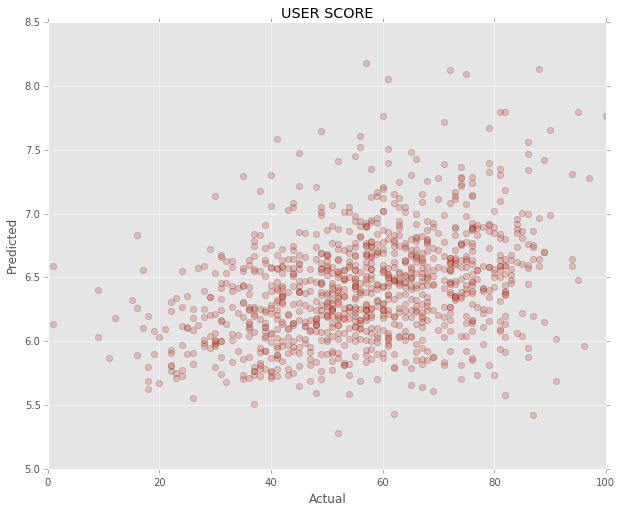

In [40]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()

plt.plot(y_test, predict1, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('USER SCORE')

> Add genre columns and build another model

In [41]:
y2, X2 = dmatrices(dependent + basic + ' + ' + genres_str, 
                 data=train, return_type='dataframe')

In [42]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     45.64
Date:                Thu, 16 Jul 2015   Prob (F-statistic):          2.07e-209
Time:                        12:45:59   Log-Likelihood:                -3421.4
No. Observations:                2745   AIC:                             6903.
Df Residuals:                    2715   BIC:                             7080.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             4.6215      0.208     22.256      0.000         4.214     5.029
rating[T.NC-17]       0.5851      0.330      1.772      0.077        -0.062     1.233
rating[T.PG]          0.1825      0.161      1.130      0.259        -0.134     0.499
rating[T.PG-13]       0.1416      0.170      0.833      0.405        -0.192     0.475
rating[T.R]           0.5208      0.171      3.046      0.002         0.186     0.856
rating[T.UNRATED]     0.6527      0.178      3.663      0.000         0.303     1.002
duration              0.0128      0.001     12.204      0.000         0.011     0.015
gross              4.742e-09   4.54e-10     10.444      0.000      3.85e-09  5.63e-09
opening           -1.084e-08   1.99e-09     -5.436      0.000     -1.48e-08 -6.93e-09
month                 0.0035      0.005      0.750      0.454        -0.006     0.013
Action               -0.2902      0.054     -5.363      0.000        -0.396    -0.184
Adventure            -0.1345      0.061     -2.198      0.028        -0.254    -0.015
Animation             0.6158      0.131      4.685      0.000         0.358     0.874
Biography             0.1980      0.073      2.701      0.007         0.054     0.342
Comedy               -0.2449      0.045     -5.470      0.000        -0.333    -0.157
Crime                -0.0676      0.048     -1.400      0.162        -0.162     0.027
Drama                 0.4012      0.046      8.651      0.000         0.310     0.492
Family               -0.3691      0.090     -4.099      0.000        -0.546    -0.193
Fantasy              -0.1526      0.072     -2.124      0.034        -0.294    -0.012
History              -0.0258      0.102     -0.253      0.800        -0.226     0.174
Horror               -0.6214      0.074     -8.396      0.000        -0.767    -0.476
Music                -0.2073      0.082     -2.518      0.012        -0.369    -0.046
Musical              -0.2127      0.134     -1.588      0.112        -0.475     0.050
Mystery              -0.0269      0.062     -0.435      0.663        -0.148     0.094
Romance              -0.1200      0.044     -2.746      0.006        -0.206    -0.034
Sci_Fi                0.0089      0.080      0.110      0.912        -0.149     0.166
Sport                -0.0044      0.096     -0.046      0.964        -0.193     0.185
Thriller             -0.0661      0.054     -1.212      0.226        -0.173     0.041
War                   0.1866      0.108      1.720      0.086        -0.026     0.399
Western               0.1077      0.258      0.417      0.676        -0.398     0.614
==============================================================================
Omnibus:                      359.527   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.817
Skew:   

In [156]:
y_test, X_test = dmatrices(dependent + basic + ' + ' + genres_str, 
                           data=test, return_type='dataframe')

predict2 = results2.predict(X_test)

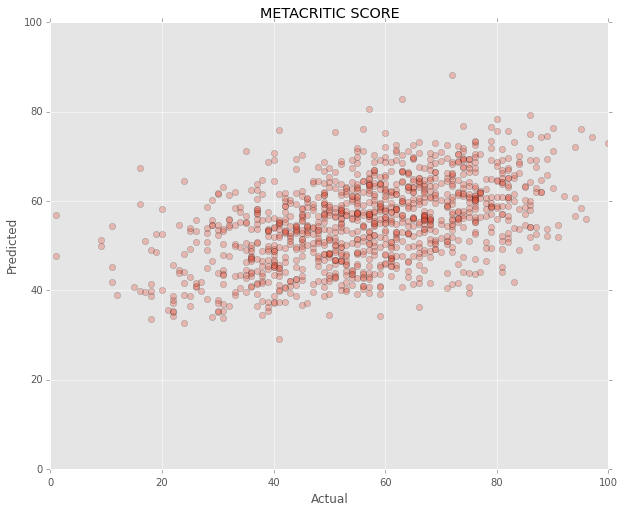

In [157]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict2, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [166]:
formula = 'metacritic ~ ' + basic + '+' + genres_str + '+' + highmeta_studios_str

In [167]:
y3, X3 = dmatrices(formula, data=train, return_type='dataframe')

model3 = sm.OLS(y3, X3)
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     26.52
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          3.48e-194
Time:                        20:20:54   Log-Likelihood:                -11974.
No. Observations:                2919   AIC:                         2.405e+04
Df Residuals:                    2869   BIC:                         2.435e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 34.4589      3.327     10.357      0.000        27.935    40.983
rating[T.NC-17]                            4.8822      5.618      0.869      0.385        -6.134    15.898
rating[T.PG]                              -4.9604      2.421     -2.049      0.041        -9.707    -0.214
rating[T.PG-13]                           -4.5755      2.603     -1.758      0.079        -9.679     0.528
rating[T.R]                                1.8438      2.621      0.703      0.482        -3.296     6.984
rating[T.UNRATED]                          9.3735      2.766      3.389      0.001         3.950    14.797
duration                                   0.1543      0.018      8.624      0.000         0.119     0.189
gross                                   7.291e-08   7.64e-09      9.541      0.000      5.79e-08  8.79e-08
opening                                -1.091e-07    3.3e-08     -3.303      0.001     -1.74e-07 -4.43e-08
month                                      0.0794      0.080      0.996      0.320        -0.077     0.236
Action                                    -5.7982      0.910     -6.371      0.000        -7.583    -4.014
Adventure                                 -0.2709      1.021     -0.265      0.791        -2.273     1.731
Animation                                 10.5836      1.827      5.792      0.000         7.000    14.167
Biography                                  2.1648      1.269      1.705      0.088        -0.324     4.654
Comedy                                    -2.8111      0.761     -3.692      0.000        -4.304    -1.318
Crime                                     -1.8900      0.828     -2.282      0.023        -3.514    -0.266
Drama                                      7.9120      0.783     10.110      0.000         6.378     9.446
Family                                    -0.0693      1.479     -0.047      0.963        -2.969     2.831
Fantasy                                   -2.4347      1.222     -1.992      0.046        -4.831    -0.038
History                                    0.9018      1.770      0.510      0.610        -2.568     4.372
Horror                                    -7.9927      1.247     -6.411      0.000       -10.437    -5.548
Music                                     -1.2640      1.425     -0.887      0.375        -4.057     1.529
Musical                                   -2.0530      2.312     -0.888      0.375        -6.585     2.479
Mystery                                   -2.0474      1.066     -1.920      0.055        -4.138     0.043
Romance                                   -2.5058      0.749     -3.346      0.001        -3.974    -1.037
Sci_Fi                                    -1.3073      1.363     -0.959      0.338     

In [168]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict3 = results3.predict(X_test)

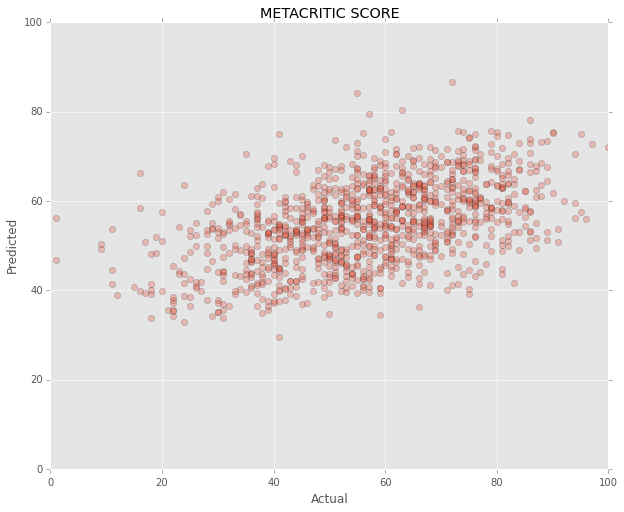

In [169]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict3, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [170]:
formula = ('metacritic ~ ' + basic + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [171]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

In [172]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.71
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          1.94e-195
Time:                        20:24:35   Log-Likelihood:                -11941.
No. Observations:                2919   AIC:                         2.402e+04
Df Residuals:                    2851   BIC:                         2.442e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                   34.4134      3.365     10.228      0.000        27.816    41.011
rating[T.NC-17]                              4.8431      5.604      0.864      0.388        -6.146    15.832
rating[T.PG]                                -3.9324      2.458     -1.600      0.110        -8.752     0.887
rating[T.PG-13]                             -3.4614      2.676     -1.294      0.196        -8.708     1.786
rating[T.R]                                  2.3104      2.676      0.863      0.388        -2.936     7.557
rating[T.UNRATED]                            9.4677      2.811      3.369      0.001         3.957    14.979
duration                                     0.1542      0.018      8.626      0.000         0.119     0.189
gross                                     7.553e-08   7.78e-09      9.711      0.000      6.03e-08  9.08e-08
opening                                  -9.041e-08   3.37e-08     -2.682      0.007     -1.57e-07 -2.43e-08
month                                        0.0883      0.079      1.113      0.266        -0.067     0.244
Action                                      -5.7376      0.907     -6.328      0.000        -7.515    -3.960
Adventure                                   -0.1314      1.023     -0.128      0.898        -2.138     1.875
Animation                                    9.8453      1.823      5.400      0.000         6.270    13.420
Biography                                    2.0442      1.263      1.619      0.106        -0.432     4.520
Comedy                                      -2.6795      0.759     -3.533      0.000        -4.167    -1.192
Crime                                       -1.5024      0.825     -1.821      0.069        -3.120     0.115
Drama                                        7.6940      0.783      9.825      0.000         6.158     9.229
Family                                       0.2821      1.484      0.190      0.849        -2.628     3.193
Fantasy                                     -2.2177      1.219     -1.820      0.069        -4.607     0.172
History                                      0.8082      1.757      0.460      0.646        -2.638     4.254
Horror                                      -7.3831      1.252     -5.899      0.000        -9.837    -4.929
Music                                       -1.3443      1.418     -0.948      0.343        -4.124     1.435
Musical                                     -2.2072      2.294     -0.962      0.336        -6.706     2.292
Mystery                                     -2.3245      1.063     -2.186      0.029        -4.410    -0.239
Romance                                     -2.4886      0.747     -3.333      0.001        -3.953    -1.025
Sci_Fi                         

In [179]:
basic2 = 'np.log(duration) + np.log(gross) + np.log(opening) + rating + month'

formula = ('metacritic ~ ' + basic2 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [180]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     23.44
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          1.71e-220
Time:                        20:35:00   Log-Likelihood:                -11879.
No. Observations:                2919   AIC:                         2.389e+04
Df Residuals:                    2851   BIC:                         2.430e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                  -62.6557      9.776     -6.409      0.000       -81.823   -43.488
rating[T.NC-17]                              2.7659      5.491      0.504      0.615        -8.001    13.533
rating[T.PG]                                -3.6561      2.408     -1.519      0.129        -8.377     1.065
rating[T.PG-13]                             -2.7202      2.618     -1.039      0.299        -7.854     2.414
rating[T.R]                                  1.8312      2.627      0.697      0.486        -3.319     6.981
rating[T.UNRATED]                            9.3443      2.801      3.336      0.001         3.853    14.836
np.log(duration)                            23.3006      2.086     11.171      0.000        19.211    27.391
np.log(gross)                                2.9863      0.234     12.776      0.000         2.528     3.445
np.log(opening)                             -2.9756      0.204    -14.593      0.000        -3.375    -2.576
month                                        0.1398      0.078      1.801      0.072        -0.012     0.292
Action                                      -4.3465      0.893     -4.865      0.000        -6.098    -2.595
Adventure                                    0.6548      0.995      0.658      0.511        -1.297     2.606
Animation                                   11.5601      1.783      6.485      0.000         8.065    15.056
Biography                                    2.0683      1.238      1.670      0.095        -0.360     4.496
Comedy                                      -1.9052      0.746     -2.554      0.011        -3.368    -0.442
Crime                                       -0.8229      0.812     -1.013      0.311        -2.416     0.770
Drama                                        5.8080      0.768      7.561      0.000         4.302     7.314
Family                                       0.5906      1.456      0.406      0.685        -2.265     3.446
Fantasy                                     -1.1045      1.187     -0.931      0.352        -3.431     1.222
History                                     -0.7353      1.720     -0.427      0.669        -4.109     2.638
Horror                                      -6.4647      1.235     -5.235      0.000        -8.886    -4.043
Music                                       -1.0483      1.389     -0.755      0.450        -3.772     1.675
Musical                                     -3.8590      2.247     -1.718      0.086        -8.264     0.546
Mystery                                     -2.6421      1.045     -2.529      0.011        -4.690    -0.594
Romance                                     -2.5496      0.732     -3.485      0.000        -3.984    -1.115
Sci_Fi                         

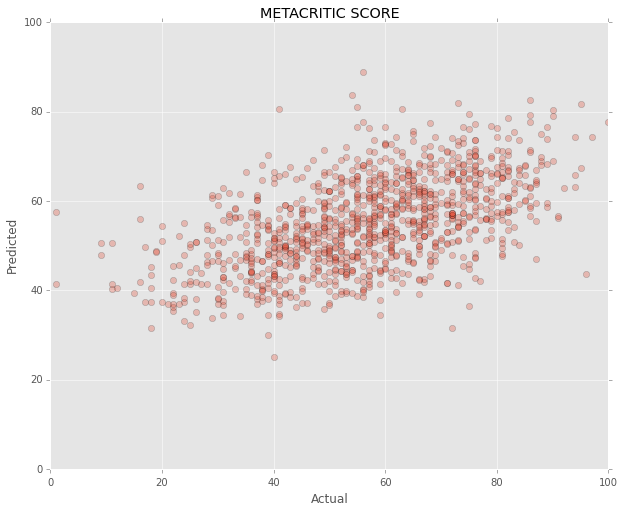

In [181]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict4 = results4.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [187]:
model5 = ElasticNet(1.0, l1_ratio = 0.5)
results5 = model5.fit(X4, y4)

In [190]:
results5.coef_

array([ 0.        ,  0.        , -0.        , -0.68739933,  0.        ,
        0.31439458,  0.38353649,  1.49633504, -2.56492036,  0.19067156,
       -0.03422628,  0.        ,  0.        ,  0.        , -0.85110575,
       -0.        ,  2.27983303, -0.        , -0.        ,  0.        ,
       -0.26944012,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

In [191]:
formula

'metacritic ~ np.log(duration) + np.log(gross) + np.log(opening) + rating + month+Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western+X_why_not_productions + X_beijing_new_picture_film_co + X_bandai_visual_company + X_hbo_films + X_cj_entertainment + X_aliclo + X_arte_france_cinma + X_fidlit_productions + X_warner_independent_pictures_wip + X_focus_features + X_fandango + X_canal_espaa + X_sony_pictures_classics + X_xfilme_creative_pool + X_bbc_films + X_paramount_vantage + X_dreamworks_animation + X_fox_searchlight_pictures + X_canal + X_british_broadcasting_corporation_bbc+X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_walt_disney_pictures + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_miram

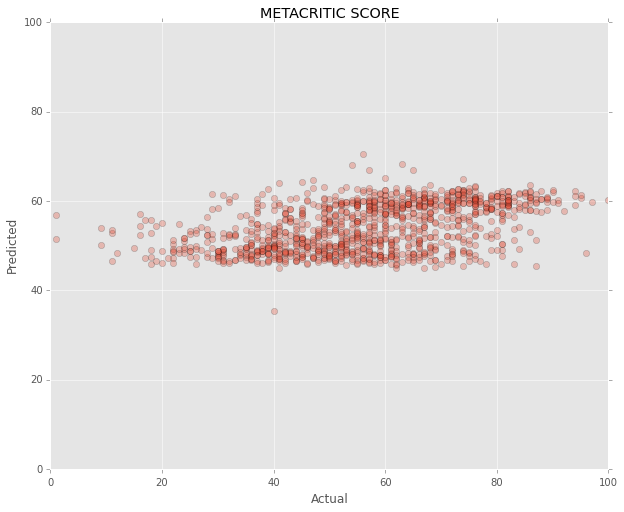

In [192]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict5, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')